## EDA for Iris Dataset

Lifecycle:
1. EDA
2. Data Preprocessing
3. feature selection
4. feature engineering
5. training and evaluation
6. tuning the model

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [32]:
data = load_iris(as_frame=True)
df = pd.DataFrame(data.data)
df['target'] = data.target
target_names = {0:'setosa', 1: 'veriscolor', 2: 'verginica'}
df['target_names'] = df['target'].map(target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,verginica
146,6.3,2.5,5.0,1.9,2,verginica
147,6.5,3.0,5.2,2.0,2,verginica
148,6.2,3.4,5.4,2.3,2,verginica


## EDA

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


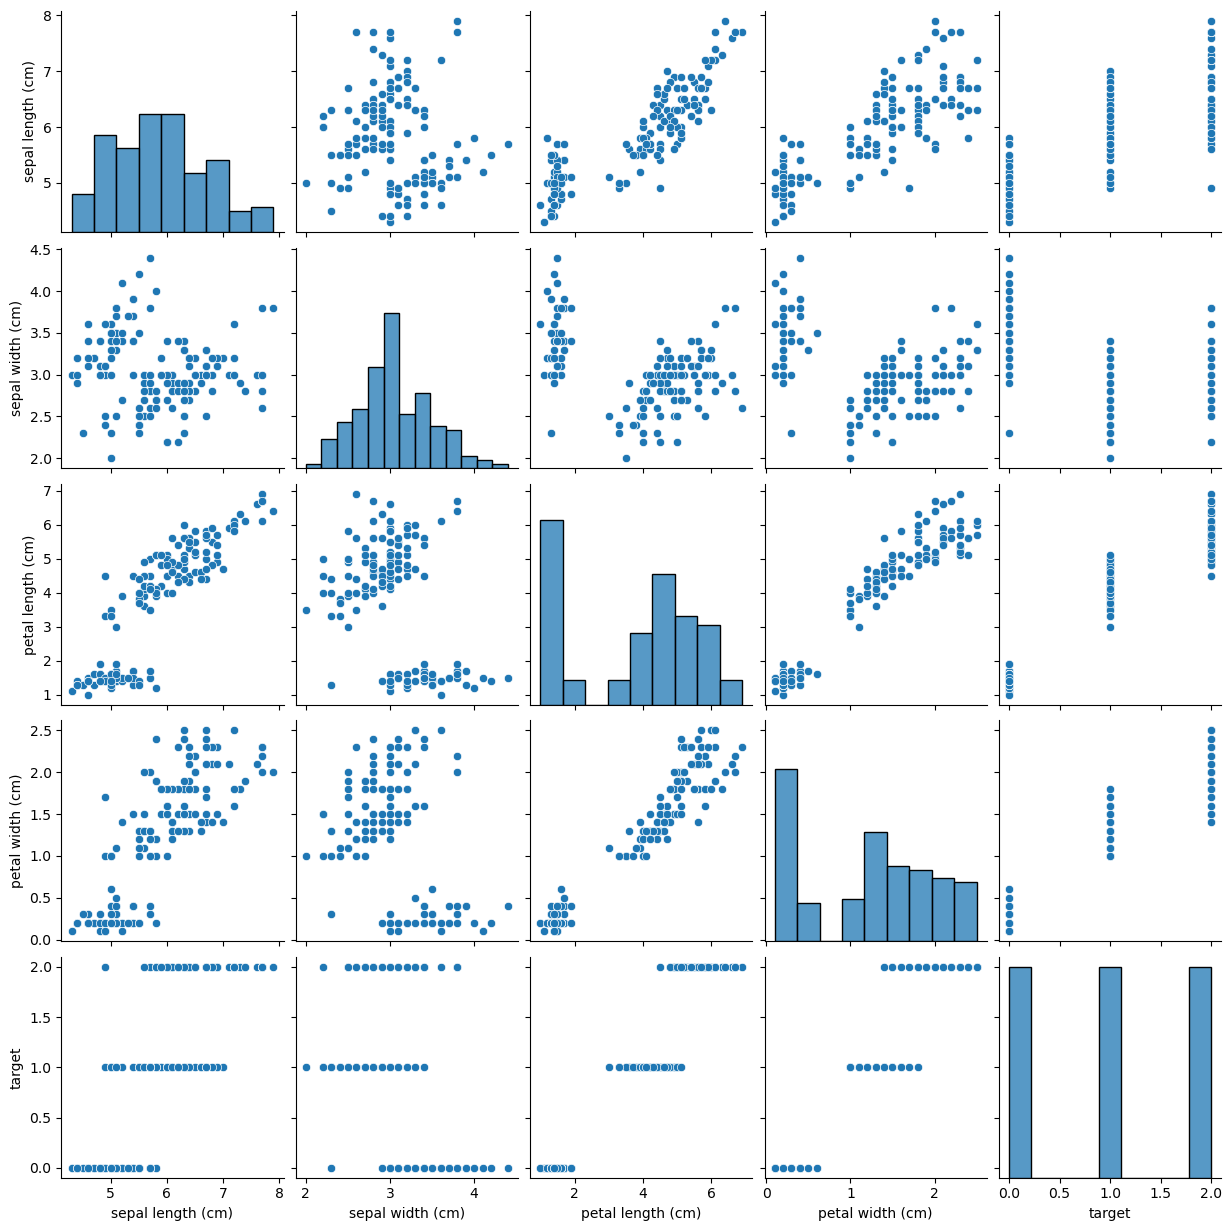

In [35]:
sns.pairplot(df)

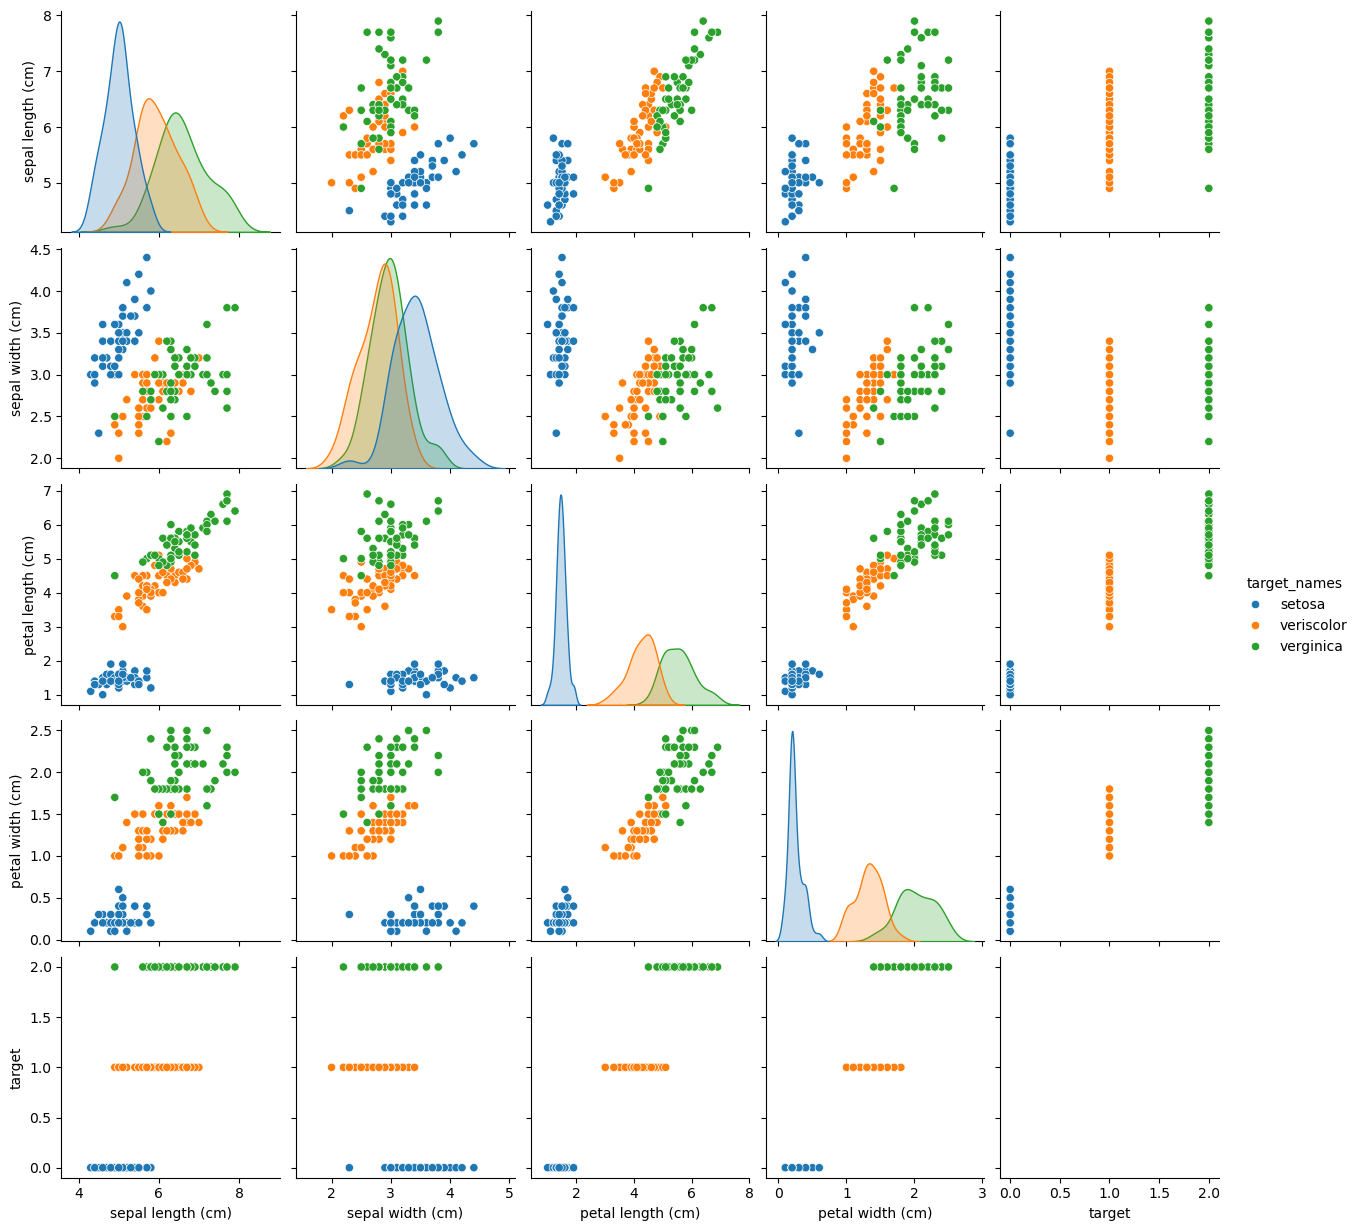

In [36]:
sns.pairplot(data = df, hue='target_names')

In [40]:
cols = list(df.columns)
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'target_names']

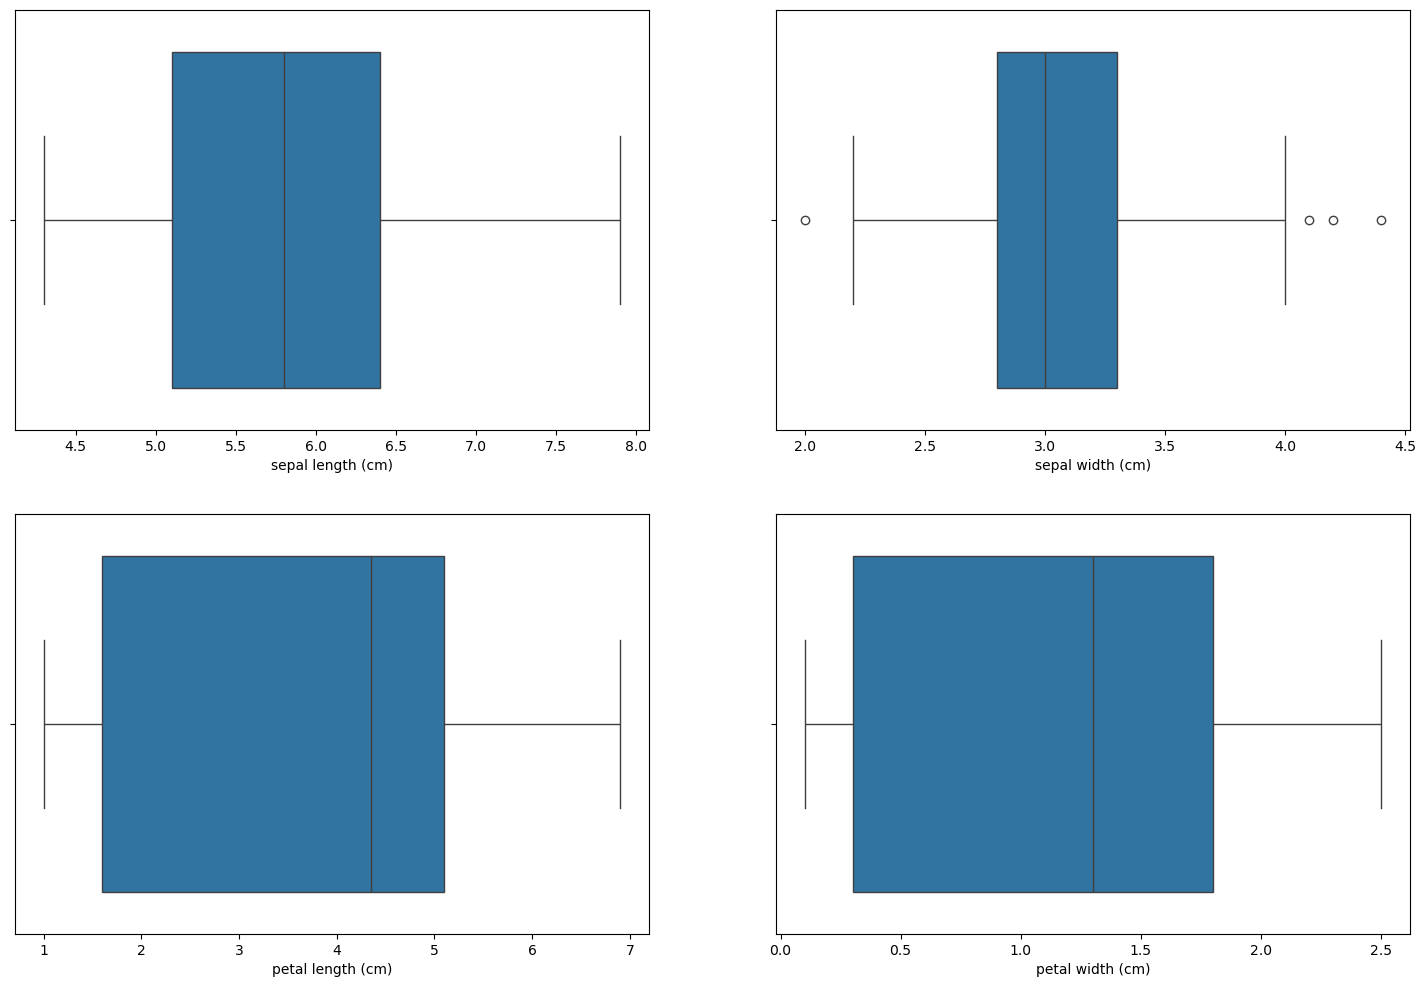

In [62]:
fig, axes = plt.subplots(nrows = 2,ncols=2, figsize=(18, 12))
for i,col in enumerate(cols[:-2]):
    row = i//2
    column = i % 2
    sns.boxplot(x=df[col],ax=axes[row][column])


In [63]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

In [64]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

## Data Preprocessing

In [66]:
standard = StandardScaler()

In [76]:
standard.fit(df.iloc[:,:-2])

StandardScaler()

In [79]:
df_standard = df.copy()
df_standard.iloc[:,:-2] = standard.transform(df.iloc[:,:-2])
df_standard

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,verginica
146,0.553333,-1.282963,0.705921,0.922303,2,verginica
147,0.795669,-0.131979,0.819596,1.053935,2,verginica
148,0.432165,0.788808,0.933271,1.448832,2,verginica


In [80]:
df_standard.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


## Training and Evaluation

In [83]:
X = df_standard.iloc[:,:-2]
y = df_standard['target']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [85]:
k_acc = []
pred = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred.append(pred_i)
    acc_i = accuracy_score(pred_i, y_test)
    k_acc.append(acc_i)
    

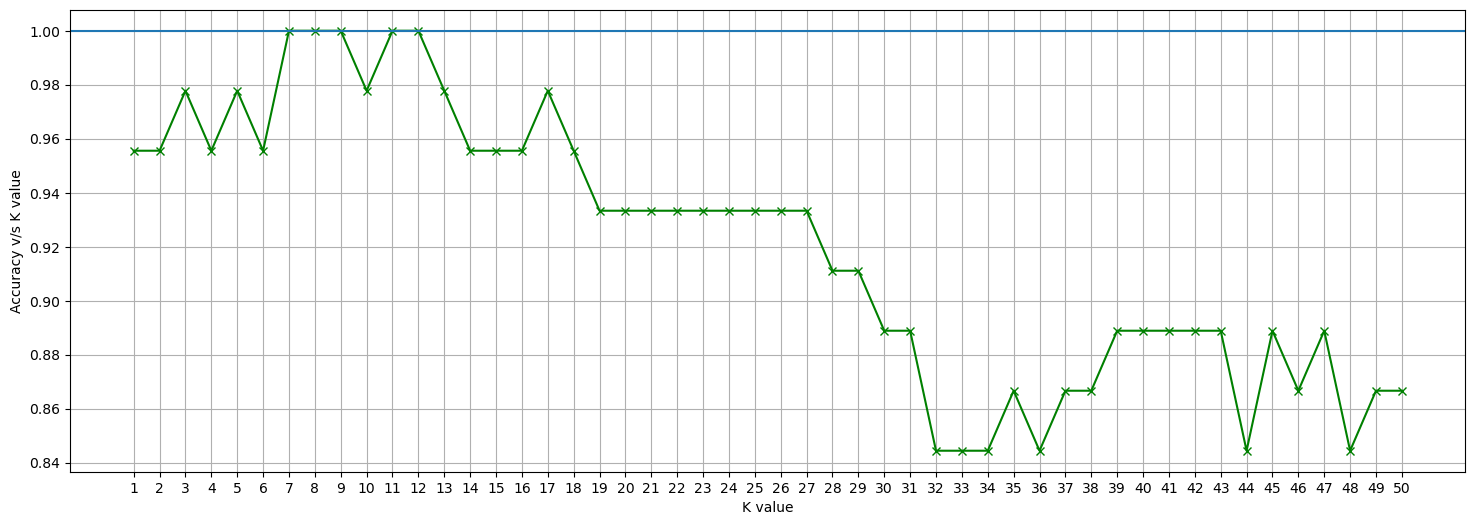

In [96]:
fig, axe = plt.subplots(figsize = (18,6))
axe.plot(range(1,51), k_acc, color='green', marker='x')
axe.axhline(y=1)
axe.grid(True)
axe.set_xticks(range(1,51))
axe.set_xlabel("K value")
axe.set_ylabel("Accuracy v/s K value")
plt.show()

In [98]:
print(confusion_matrix(pred[11], y_test))
print("\n")
print(classification_report(pred[11],y_test))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

